In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import requests
import io
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [23]:
#import dataset
url = "https://www.cs.purdue.edu/homes/ribeirob/courses/Spring2018/data/creditcard.csv"
s = requests.get(url).content
dataset = pd.read_csv(io.StringIO(s.decode('utf-8')))
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


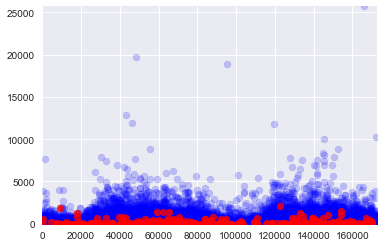

In [24]:
%matplotlib inline
def plot_time(dataset):
##### Checking the time series (fraud)
    df1 = dataset.loc[dataset['Class']==1, :]
    df2 = dataset.loc[dataset['Class']==0, :]
    
    fig2, ax2 = plt.subplots()
    x1 = df1['Time']
    y1 = df1['Amount']
    x2 = df2['Time']
    y2 = df2['Amount']
    ax2.scatter(x2, y2, alpha=0.2, color ='blue')
    ax2.scatter(x1, y1, alpha=0.8, color='red')
    ax2.set_xlim((0, max(x2)))
    ax2.set_ylim((0, max(y2)))
plot_time(dataset)

In [25]:
# drop the variable time
dataset = dataset.drop("Time", axis=1)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
print(dataset.columns.values)

['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13' 'V14'
 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25' 'V26'
 'V27' 'V28' 'Amount' 'Class']


In [27]:
dataset_revised=dataset.drop("Class", axis=1)
dataset_revised=dataset_revised.drop("Amount", axis=1)
dataset_revised.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


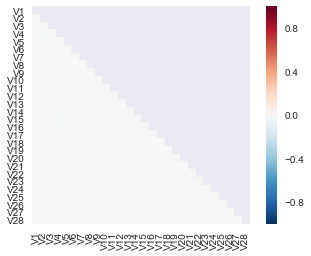

In [28]:
##the PCA columns are not correlated to each other
%matplotlib inline
def plot_corr(dataset_revised):
    # Check correlation of PCA variables
    corr = dataset_revised.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    fig1, ax1 = plt.subplots()
    corrplot = sns.heatmap(corr, mask=mask, square=True, ax=ax1)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)

plot_corr(dataset_revised)

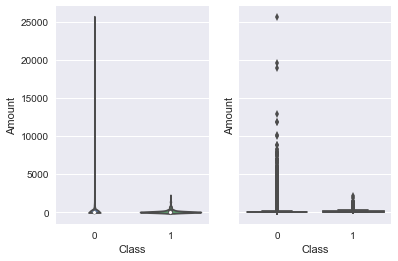

In [29]:
%matplotlib inline
def plot_dist(dataset):
    fig3, (ax3_1, ax3_2) = plt.subplots(ncols=2, sharey=True)
    sns.violinplot(x=dataset['Class'], y=dataset['Amount'], ax=ax3_1)
    sns.boxplot(x=dataset['Class'], y=dataset['Amount'], ax=ax3_2)
plot_dist(dataset)
#Outliers heavily skew the class 0

In [31]:
##preprocess the dataset and crossvalidate
X = dataset.drop("Class", axis=1)
Y = dataset[["Class"]].values.ravel()

#Split the dataset into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(199364, 29) (199364,)
(85443, 29) (85443,)


In [32]:
# Train a logistic regression classifier
logreg = linear_model.LogisticRegression(penalty='l2', C=10**-8, multi_class='ovr')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [33]:
# Print out the accuracy of the classifier
CM = confusion_matrix(Y_test, Y_pred)
print("Accuracy of positive class:",CM[1,1]/(CM[1,0]+CM[1,1]))
print("Accuracy of negative class:",CM[0,0]/(CM[0,0]+CM[0,1]))
#The accuracy of the positive class is very low, so there exists data selection bias.

Accuracy of positive class: 0.0347222222222
Accuracy of negative class: 0.999929659199


In [34]:
# Increase C
# Train a logistic regression classifier
logreg = linear_model.LogisticRegression(penalty='l2', C=10**-2, multi_class='ovr')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
# Print out the accuracy of the classifier
CM = confusion_matrix(Y_test, Y_pred)
print("Accuracy of positive class:",CM[1,1]/(CM[1,0]+CM[1,1]))
print("Accuracy of negative class:",CM[0,0]/(CM[0,0]+CM[0,1]))
#Adjust the regularizer to increase the accuracy of the positive class

Accuracy of positive class: 0.569444444444
Accuracy of negative class: 0.999906212265


In [35]:
# Train logistic regression with data selection bias
# Calculate the weight from training set
logreg = linear_model.LogisticRegression(penalty='l2', class_weight={0:1, 1:577.78}, C=1, multi_class='ovr')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

# Print out the accuracy of the classifier
CM = confusion_matrix(Y_test, Y_pred)
print("Accuracy of positive class:",CM[1,1]/(CM[1,0]+CM[1,1]))
print("Accuracy of negative class:",CM[0,0]/(CM[0,0]+CM[0,1]))

Accuracy of positive class: 0.923611111111
Accuracy of negative class: 0.977690242559
